<a href="https://colab.research.google.com/github/Bhavana-1124/Samsung_Capstone_Project_1/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MEDICAL COST PREDICTION

In [ ]:
from google.colab import files
files.upload()

Saving medical_costs.csv to medical_costs.csv


{'medical_costs.csv': b'age,bmi,procedures_count,smoking_status,alcohol_consumption,chronic_conditions,insurance_plan,hospital_tier,geographic_region,specialty_consultations,diagnostic_tests,emergency_visit,preventive_care,total_cost_usd\n62.0,42.313469096655226,5.0,Non-smoker,Moderate,2.0,Medicare,Tier 2,West,1.0,5.0,Yes,No,21075.41949413862\n40.0,41.72435579281979,5.0,Former,Moderate,3.0,PPO,Tier 2,Northeast,0.0,1.0,No,Yes,43051.67037653763\n80.0,37.68528222063976,5.0,Non-smoker,Moderate,3.0,PPO,Tier 2,Midwest,1.0,0.0,No,,101842.59394406051\n,26.63566523472074,7.0,Non-smoker,None,1.0,Medicare,Tier 3,Midwest,1.0,4.0,No,No,97861.50901187496\n62.0,44.367618375125645,,Non-smoker,None,3.0,HMO,Tier 1,West,,4.0,No,No,\n39.0,39.01529284549848,7.0,Non-smoker,Light,2.0,Medicare,Tier 1,South,2.0,2.0,No,Yes,65673.83556682966\n40.0,43.48925582354106,1.0,Former,None,3.0,Medicare,Tier 2,Midwest,2.0,3.0,No,Yes,71610.28046946347\n29.0,,5.0,Non-smoker,Heavy,1.0,PPO,Tier 2,South,1.0,1.0,No,No,80637.003

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = {
    'Age': [23, 45, 31, 52, 36, 47, 29, 61, 41, 34],
    'BMI': [22.5, 30.1, 27.8, 33.5, 26.4, 29.9, 24.3, 35.2, 28.6, 25.1],
    'Procedures': [1, 4, 2, 5, 2, 3, 1, 6, 3, 2],
    'Medical_Cost': [2500, 12000, 6000, 18000, 7000, 11000, 3000, 22000, 9000, 6500]
}

df = pd.DataFrame(data)
df

,Age,BMI,Procedures,Medical_Cost
0,23,22.5,1,2500
1,45,30.1,4,12000
2,31,27.8,2,6000
3,52,33.5,5,18000
4,36,26.4,2,7000
5,47,29.9,3,11000
6,29,24.3,1,3000
7,61,35.2,6,22000
8,41,28.6,3,9000
9,34,25.1,2,6500


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('/content/medical_costs.csv')

# Display first few rows
df.head()

,age,bmi,procedures_count,smoking_status,alcohol_consumption,chronic_conditions,insurance_plan,hospital_tier,geographic_region,specialty_consultations,diagnostic_tests,emergency_visit,preventive_care,total_cost_usd
0,62.0,42.313469,5.0,Non-smoker,Moderate,2.0,Medicare,Tier 2,West,1.0,5.0,Yes,No,21075.419494
1,40.0,41.724356,5.0,Former,Moderate,3.0,PPO,Tier 2,Northeast,0.0,1.0,No,Yes,43051.670377
2,80.0,37.685282,5.0,Non-smoker,Moderate,3.0,PPO,Tier 2,Midwest,1.0,0.0,No,NaN,101842.593944
3,NaN,26.635665,7.0,Non-smoker,NaN,1.0,Medicare,Tier 3,Midwest,1.0,4.0,No,No,97861.509012
4,62.0,44.367618,NaN,Non-smoker,NaN,3.0,HMO,Tier 1,West,NaN,4.0,No,No,NaN


In [ ]:
# Shape of dataset
df.shape

(1000, 14)

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      950 non-null    float64
 1   bmi                      954 non-null    float64
 2   procedures_count         946 non-null    float64
 3   smoking_status           947 non-null    object 
 4   alcohol_consumption      690 non-null    object 
 5   chronic_conditions       952 non-null    float64
 6   insurance_plan           944 non-null    object 
 7   hospital_tier            958 non-null    object 
 8   geographic_region        949 non-null    object 
 9   specialty_consultations  949 non-null    float64
 10  diagnostic_tests         950 non-null    float64
 11  emergency_visit          957 non-null    object 
 12  preventive_care          953 non-null    object 
 13  total_cost_usd           951 non-null    float64
dtypes: float64(7), object(7)


In [ ]:
# Statistical summary
df.describe()

,age,bmi,procedures_count,chronic_conditions,specialty_consultations,diagnostic_tests,total_cost_usd
count,950.000000,954.000000,946.000000,952.000000,949.000000,950.000000,951.000000
mean,51.613684,31.092598,3.498943,1.470588,1.920969,2.581053,75701.404276
std,19.218044,8.070722,2.296650,1.108791,1.401880,1.680251,43620.653046
min,18.000000,17.033035,0.000000,0.000000,0.000000,0.000000,636.755449
25%,36.000000,24.479103,1.250000,0.000000,1.000000,1.000000,38173.515594
50%,52.000000,30.620206,4.000000,1.000000,2.000000,3.000000,76272.799810
75%,69.000000,38.303786,5.000000,2.000000,3.000000,4.000000,113560.100525
max,84.000000,44.883125,7.000000,3.000000,4.000000,5.000000,149997.456218


MISSING VALUES

In [ ]:
# Check missing values
df.isnull().sum()

,0
age,50
bmi,46
procedures_count,54
smoking_status,53
alcohol_consumption,310
chronic_conditions,48
insurance_plan,56
hospital_tier,42
geographic_region,51
specialty_consultations,51


In [ ]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1681753437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1681753437.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

REMOVE DUPLICATE RECORDS

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

SAVED CLEANED DATASET

In [ ]:
df.to_csv('medical_costs_cleaned.csv', index=False)

In [ ]:
print("Cleaned Dataset Saved Successfully")

Cleaned Dataset Saved Successfully


In [ ]:
# Recheck missing values
df.isnull().sum()

,0
age,0
bmi,0
procedures_count,0
smoking_status,0
alcohol_consumption,0
chronic_conditions,0
insurance_plan,0
hospital_tier,0
geographic_region,0
specialty_consultations,0


EDA and Data Visualization

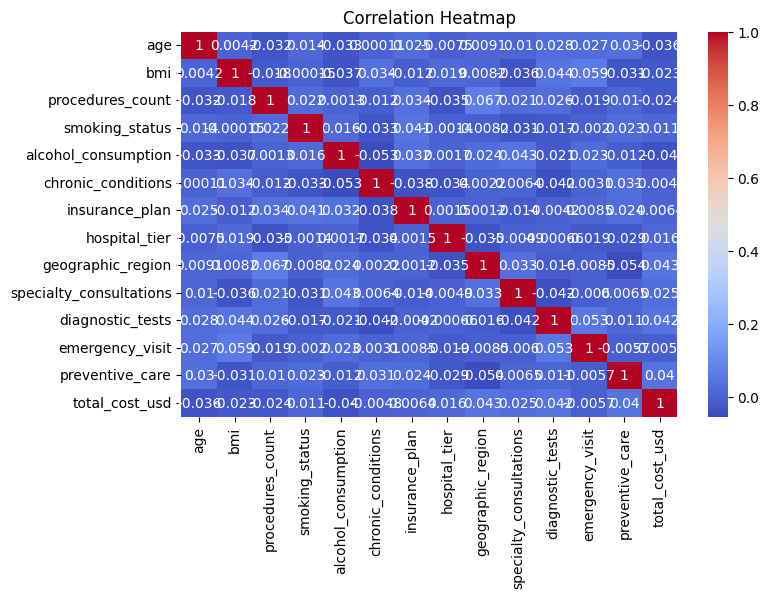

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

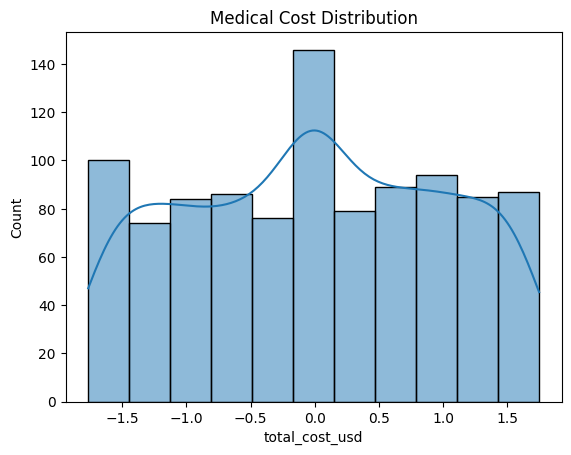

In [ ]:
sns.histplot(df['total_cost_usd'], kde=True)
plt.title('Medical Cost Distribution')
plt.show()

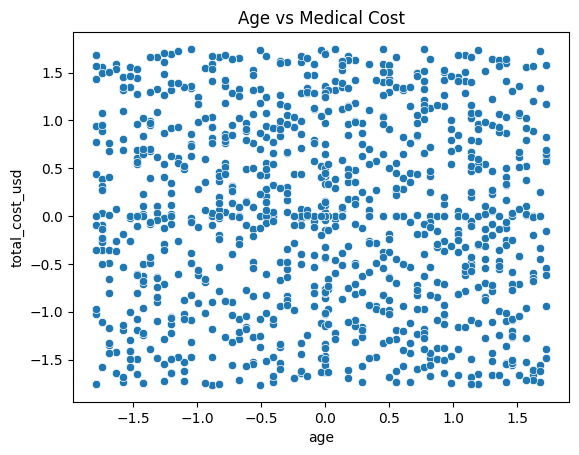

In [ ]:
sns.scatterplot(x='age', y='total_cost_usd', data=df)
plt.title('Age vs Medical Cost')
plt.show()

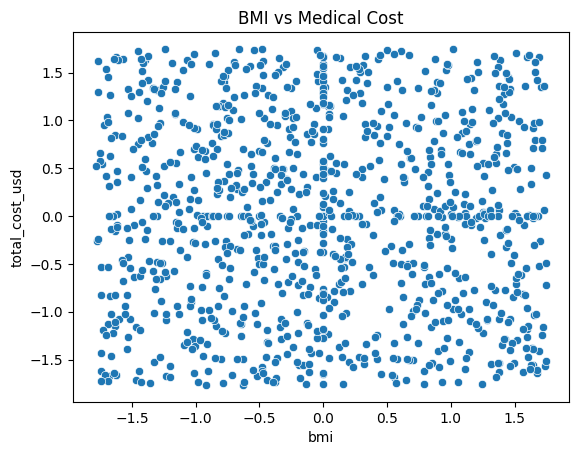

In [ ]:
sns.scatterplot(x='bmi', y='total_cost_usd', data=df)
plt.title('BMI vs Medical Cost')
plt.show()

Different Types of Regression

In [ ]:
X = df[['age', 'bmi', 'procedures_count']]
y = df['total_cost_usd']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

REGRESSION EVALUATION

In [ ]:
from sklearn.metrics import r2_score

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

Linear Regression R2: -0.01970887826249812
Ridge Regression R2: -0.019701764059705917
Lasso Regression R2: -0.01734123460600756


Different Types of Conventional Classification

In [ ]:
# Convert cost into categories
df['Cost_Category'] = pd.cut(
    df['total_cost_usd'],
    bins=[0, 5000, 15000, 100000],
    labels=['Low', 'Medium', 'High']
)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cost_Category'] = le.fit_transform(df['Cost_Category'])

In [ ]:
X = df[['age', 'bmi', 'procedures_count']]
y = df['Cost_Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print("Logistic Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Logistic Accuracy: 0.495
KNN Accuracy: 0.45
Decision Tree Accuracy: 0.515


Classification Using Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500)
nn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)

In [ ]:
y_pred_nn = nn.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

Neural Network Accuracy: 0.465


GRAPH BASED ON AGE

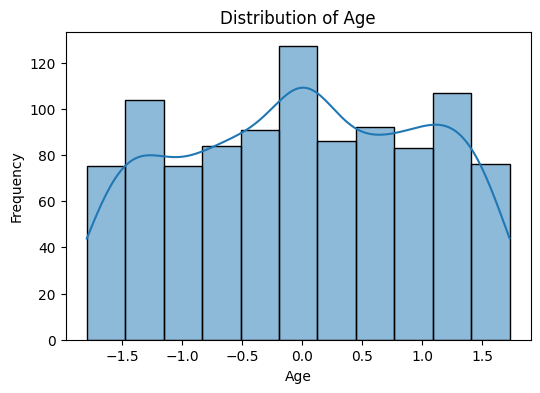

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

BOXPLOT

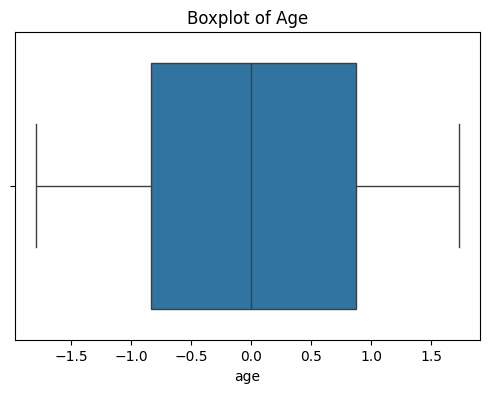

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

GRAPH BASED ON BMI

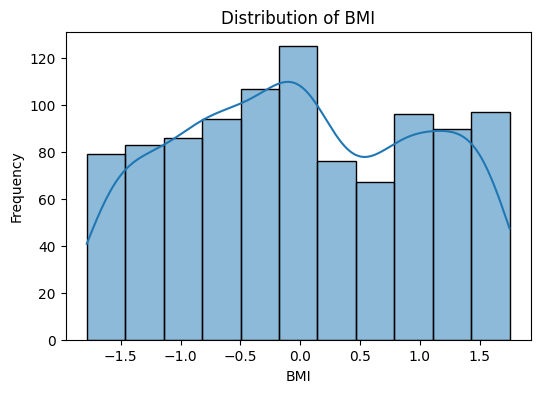

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

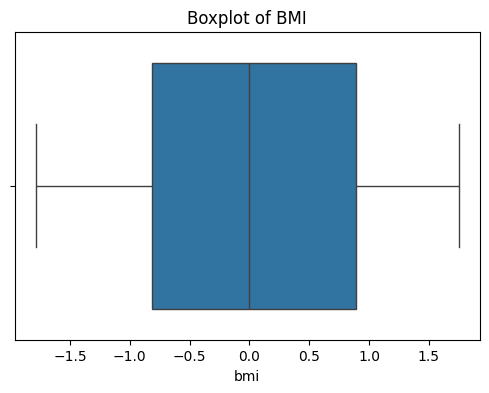

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['bmi'])
plt.title("Boxplot of BMI")
plt.show()

GRAPH BASED ON PROCEDURES

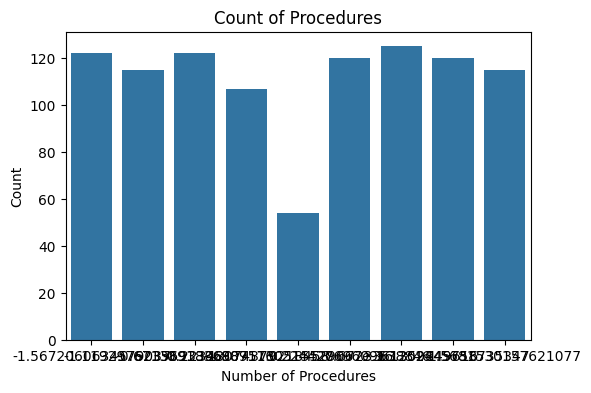

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['procedures_count'])
plt.title("Count of Procedures")
plt.xlabel("Number of Procedures")
plt.ylabel("Count")
plt.show()

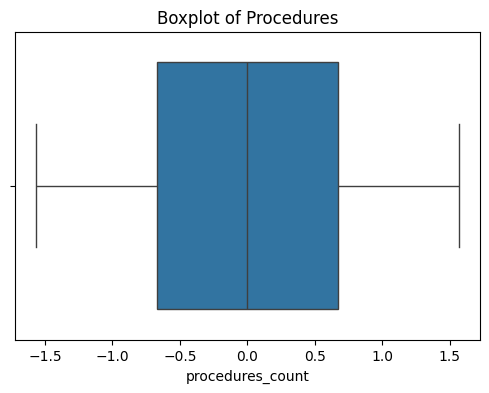

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['procedures_count'])
plt.title("Boxplot of Procedures")
plt.show()

GRAPH BASED ON MEDICAL COST

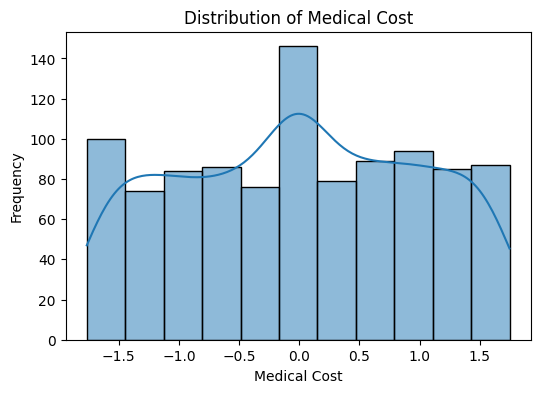

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_cost_usd'], kde=True)
plt.title("Distribution of Medical Cost")
plt.xlabel("Medical Cost")
plt.ylabel("Frequency")
plt.show()

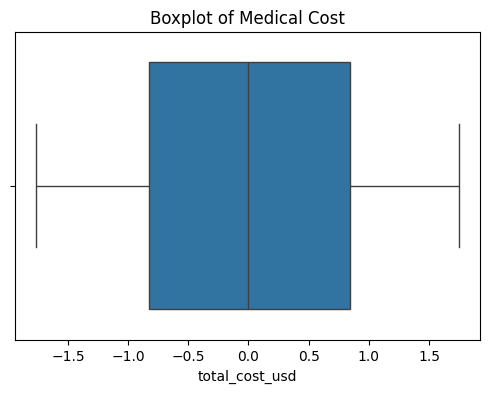

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_cost_usd'])
plt.title("Boxplot of Medical Cost")
plt.show()

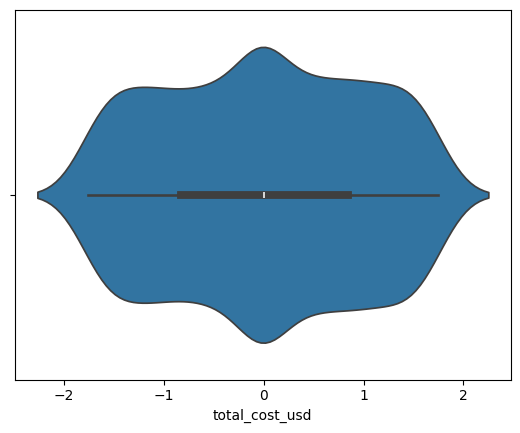

In [ ]:
sns.violinplot(x=df['total_cost_usd'])
plt.show()

COST CATEGORY

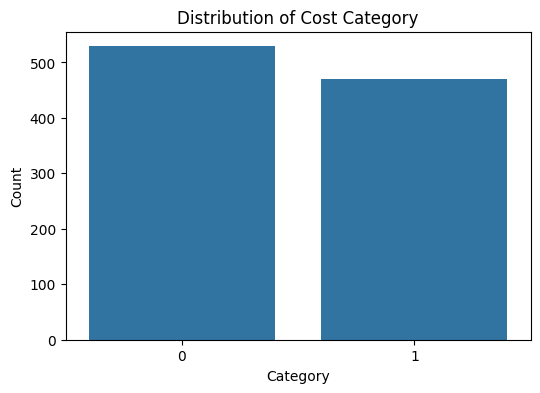

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Cost_Category'])
plt.title("Distribution of Cost Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
